# Lending Club: a default ratio prediction study

## Background

LendingClub used to be the biggest peer to peer lending platform until 2020, when they changed their business focus. During its operation, LendingClub would establish a platform for borrowers and investors where borrowers were allowed to create loan requests on its website. They were also required to provide their information like credit score, credit history, desired loan amount and the debt-to-income ratio. Based on the data, LendingClub would decide if the loan request would be accepted and what the interest rate would be. Allowable loan range was between $1,000–40,000 and the return period was 3 or 5 years. Investors would make money from interest rates which were varied from 6.03% to 26.06%. LendingClub would make money from charging an origination fee to its borrowers and a service fee to its investors. The interest rates that LendingCub was offering were better for borrowers and lenders than most of banks and therefore, it was highly received. 

When a request was made, based on the requester’s information such as credit history, LendingClub would decide to either accept or reject the request. For the accepted loans, a credit grade ranging from A to G would be assigned. The credit grade along with other factors would determine the interest rate. For the rejected loan a risk score was assigned. Furthermore, the credit grade would also determine the amount of the origination fee that the requester would be charged, and it would be between 1.1–5.0% of the loan amount. The size of the service fee, that the investor would be charged, would be 1% of all amounts the borrower would pay, which was the requested amount plus the total interest. Therefore, higher interest rates would generate more revenue. However, higher interest rates also indicate a riskier loan which may end up on default and may cause investment loss for LendingClub. Therefore, having a robust method to predict the risk factor of a loan is very desirable. Statistical data shows that about 10% of loans will be defaulted. The question is if we can have a better risk analysis method and ultimately a robust predictive model to decrease loan default ratio by 50% in the next three years.


## Data sources

The data is from Kaggle website and can be found here: All Lending Club loan data | Kaggle The data is in two files and originate from Lending Club and include information of rejected and accepted loan applications from 2007 to 2018. The accepted file has 2260701 rows and 151 columns, and it includes information about type of loan, funded amount, length of loan, interest rate, grade, installment plan, employment condition (title, length), house ownership status, annual income, loan status, purpose, Fico score (low and high ranges) and if the loan was paid in full. The rejected file has 27648741 rows and 9 columns and include information about the applicant including the debt-to- income ratio, risk score, employment length and amount required.



In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime as dt

In [151]:
filepath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(filepath)

C:\Users\somfl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [122]:
# An excel file is available from LendingClub with the description of the variables in the data files. The excel sheet
# is downloaded below.
column_desc = pd.read_excel( 'https://resources.lendingclub.com/LCDataDictionary.xlsx')
column_desc = column_desc.iloc[:,0:2]
column_desc

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


In [118]:
# I need to find out what columns to drop. 151 columns are alot of data t work with. To decide what column to drop 
# I begin by finding the amount of missing data in each coulmn.

missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']

In [49]:
missing.sort_values("count", ascending=False)[0:50]

,count,%
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
hardship_reason,2249784,99.517097
hardship_status,2249784,99.517097
deferral_term,2249784,99.517097
hardship_last_payment_amount,2249784,99.517097
hardship_payoff_balance_amount,2249784,99.517097


In [50]:
missing.sort_values("count", ascending=False)[50:100]

,count,%
open_rv_24m,866162,38.313868
open_rv_12m,866162,38.313868
total_bal_il,866162,38.313868
open_il_24m,866162,38.313868
open_il_12m,866162,38.313868
open_act_il,866162,38.313868
max_bal_bc,866162,38.313868
inq_fi,866162,38.313868
mths_since_recent_inq,295468,13.069751
emp_title,167002,7.387178


In [119]:
missing.sort_values("count", ascending=False)[100:]

,count,%
collections_12_mths_ex_med,178,0.007874
tax_liens,138,0.006104
last_credit_pull_d,105,0.004645
inq_last_6mths,63,0.002787
total_acc,62,0.002743
delinq_2yrs,62,0.002743
earliest_cr_line,62,0.002743
open_acc,62,0.002743
pub_rec,62,0.002743
acc_now_delinq,62,0.002743


## What features (columns) can be dropped?

#### General features
member_id: it's the id each borrower (or member) in LendingClub is given and because the source data is deidentified, member_ids are removed before publicizing. So the whole column can be dropped.
url, 
zip_code
#### Duplicate features.
loan_amount is similar to funded amount, so is dropped.
funded_amnt_inv is the amount investors fund, does not affect decision and is dropped.

Because we are trying to find a better model to decide about loan applications, any feature that is not defined prior to the decision on the loan application can be dropped. Many of the avialble features in the source data refer to th applicant credit card performance during the loan and are irrelavent for initial decision making. These feature include number of bank cards, number of mortages, installments, trades during the loan, delinquecies and etc.  
open_rv_24m	
open_rv_12m	
total_bal_il	
open_il_24m	
open_il_12m	
open_act_il	
max_bal_bc		
inq_fi		
mths_since_recent_inq
mths_since_last_record	
mths_since_recent_bc_dlq	
mths_since_last_major_derog	
mths_since_recent_revol_delinq	
next_pymnt_d	
mths_since_last_delinq	
il_util	
mths_since_rcnt_il	
all_util	
open_acc_6m	
total_cu_tl	
inq_last_12m

####  orig_projected_additional_accrued_interes:
As the descriptive excel sheet describes this feature is the original projected additional interest amount that will accure for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan. So it's feature which is only available after application decision and in the case of the borrower's harship in returning the loan.
#### hardship releven columns which include 
hardship_startdate, hardship_amount,  hardship_dpd, hardship_end_date, hardship_flag, hardship_last_payment_amount, hardship_length, hardship_loan_status, hardship_payoff_balance_amount, hardship_reason, hardship_start_date, hardship_status hardship_type, payment_plan_start_date, settlement_term, debt_settlement_flag_date, settlement_status	settlement_date, settlement_amount, settlement_percentage
#### Secondary applicants' data
less than 5 percent of applications are joint. For now, I'd like to focus on single applications. Therefore, I'll drop any columns and rows with data of the second applicants. These columns are: sec_app_chargeoff_within_12_mths 
sec_app_collections_12_mths_ex_med ,sec_app_earliest_cr_line, sec_app_fico_range_high, sec_app_fico_range_low, sec_app_inq_last_6mths, sec_app_mort_acc, sec_app_mths_since_last_major_derog, sec_app_num_rev_accts, sec_app_open_acc, sec_app_open_act_il, sec_app_revol_util, revol_bal_joint, verification_status_joint, dti_joint, annual_inc_joint, desc 

## What features (columns) are kept?
Any feature which is established before the decision on the loan should be kept. Furthermore, features like loan amount,  interest rate and its term that reflect the decision on the loan should be kept.These features include:
1.	revol_util	
2.	dti		
3.	pub_rec_bankruptcies	
4.	chargeoff_within_12_mths	
5.	collections_12_mths_ex_med	
6.	tax_liens	
7.	inq_last_6mths	
8.	total_acc	
9.	delinq_2yrs	
10.	earliest_cr_line	
11.	open_acc	
12.	pub_rec	
13.	acc_now_delinq	
14.	delinq_amnt		
15.	annual_inc		
16.	purpose	
17.	issue_d	
18.	pymnt_plan	
19.	sub_grade	
20.	funded_amnt	
21.	loan_status		
22.	installment	
23.	int_rate		
24.	verification_status	
25.	grade	
26.	term	
27.	disbursement_method	
28.	home_ownership		
29.	addr_state		
30.	initial_list_status	
31.	policy_code	
32.	revol_bal	
33.	fico_range_high	
34.	fico_range_low	
35.	id
36. emp_length



In [205]:
keeplist = ['revol_util','dti', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'tax_liens',
            'inq_last_6mths','total_acc', 'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'acc_now_delinq',
            'delinq_amnt', 'annual_inc', 'purpose', 'issue_d', 'pymnt_plan', 'sub_grade', 'funded_amnt', 'loan_status', 
            'installment', 'int_rate', 'verification_status', 'grade', 'term', 'disbursement_method', 'home_ownership', 'addr_state',
            'initial_list_status', 'policy_code', 'revol_bal', 'fico_range_high', 'fico_range_low', 'id', 'emp_length']

In [153]:
# Before dropping unwanted columns, I first need to drop joint application rows.
df =df[ df['application_type'] == "Individual"]
print(df.shape)
df['application_type'].unique()

(2139958, 151)


array(['Individual'], dtype=object)

In [206]:
# At this stage, I drop all irrelevant columns discussed before and only keep those columns in the keeplist. 
# After dropping unwanted columns, I check the dataframe shape. It can be seen there are 48 columns left.
df = df[keeplist]
df.shape

(2006744, 36)

## Checking the missing data in the truncated dataframe
Now that we, have drop more than 100 columns and some rows, I check again if there are missing data

In [232]:
# Check to see number and percentage of the missing data
missing1 = df.isnull().sum()
missing2 = 100*df.isnull().mean()
missing = pd.concat([missing1, missing2], axis=1)
missing.columns = ['count', '%']
missing.sort_values("count", ascending=False)

,count,%
\trevol_util\tdti\tpub_rec_bankruptcies\tchargeoff_within_12_mths\tcollections_12_mths_ex_med\ttax_liens\tinq_last_6mths\ttotal_acc\tdelinq_2yrs\tearliest_cr_line\topen_acc\tpub_rec\tacc_now_delinq\tdelinq_amnt\tannual_inc\tpurpose\tissue_d\tpymnt_plan\tsub_grade\tfunded_amnt\tloan_status\tinstallment\tint_rate\tverification_status\tgrade\tterm\tdisbursement_method\thome_ownership\taddr_state\tinitial_list_status\tpolicy_code\trevol_bal\tfico_range_high\tfico_range_low\tid\temp_length,0,0.0


### Dropping the rows with missing data
Employment length has the higher number of missing points, about 6% (130,000) of employment length is missing. revolving utility rate and banckrupcy records have about 0.07% (1000) missing points. Taking account the huge size of data we can drop all applications, where there is missing data.  

In [208]:
# Dropping the applications with missing data
df = df.dropna()
df.shape

(2006744, 36)

## Saving the new truncated data frame
At this point that I have somehow cleaned the data, I'd like to save my new truncated dataframe, so that I will not need to open the source data file, which is very time consuming. 

In [209]:
# Saving the new dataframe for easy future references:

SavePath = "C:\\Users\\somfl\\Documents\\Data Science Career Track\\LendingClub\\TruncatedData.csv"
df.to_csv(SavePath, sep ='\t')

In [272]:
df = pd.read_csv(SavePath, sep='\t')
df.head()

,Unnamed: 0,revol_util,dti,pub_rec_bankruptcies,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens,inq_last_6mths,total_acc,delinq_2yrs,...,disbursement_method,home_ownership,addr_state,initial_list_status,policy_code,revol_bal,fico_range_high,fico_range_low,id,emp_length
0,0,29.7,5.91,0.0,0.0,0.0,0.0,1.0,13.0,0.0,...,Cash,MORTGAGE,PA,w,1.0,2765.0,679.0,675.0,68407277,10+ years
1,1,19.2,16.06,0.0,0.0,0.0,0.0,4.0,38.0,1.0,...,Cash,MORTGAGE,SD,w,1.0,21470.0,719.0,715.0,68355089,10+ years
2,3,11.6,17.06,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,Cash,MORTGAGE,NJ,w,1.0,7802.0,789.0,785.0,66310712,10+ years
3,4,64.5,25.37,0.0,0.0,0.0,0.0,3.0,35.0,1.0,...,Cash,MORTGAGE,PA,w,1.0,21929.0,699.0,695.0,68476807,3 years
4,5,68.4,10.20,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,Cash,RENT,GA,w,1.0,8822.0,694.0,690.0,68426831,4 years


In [275]:
dffloat = df.select_dtypes(np.number)
dffloat.shape

(2006744, 21)

In [276]:
dfobject = df.select_dtypes(object)
dfobject.shape

(2006744, 14)

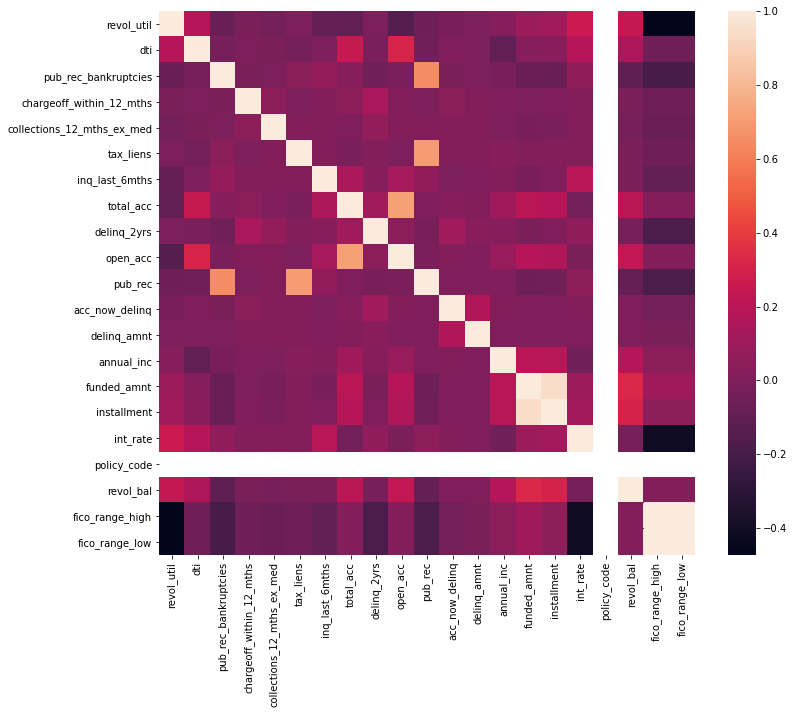

In [277]:
# Show a seaborn heatmap of correlations in dffloat
#I call pandas' `corr()` method on `dffloat` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(dffloat.corr());

## What do we learn from the heat map?
_'fico_range_low'_ and _'fico_range_high'_ are highly correlated, so probably an average value can replace the low and high ranges. 

While _'policy code'_ is a numerical value, it is not correlated to anything and I will look into it later again.

_'installment'_ and _'funded amount'_ are correlated, which is not surprising.

Number of _'open account'_ and _'total_account'_ are also correlated, as well as _'public_record'_ and _'pubilc_record_bankrupcies'_.



id
27531874    5.0
20760443    5.0
78549809    5.0
70580342    5.0
56038421    5.0
           ... 
76043266    4.0
75750600    4.0
76292405    4.0
75417201    4.0
88215728    4.0
Length: 2006744, dtype: float64


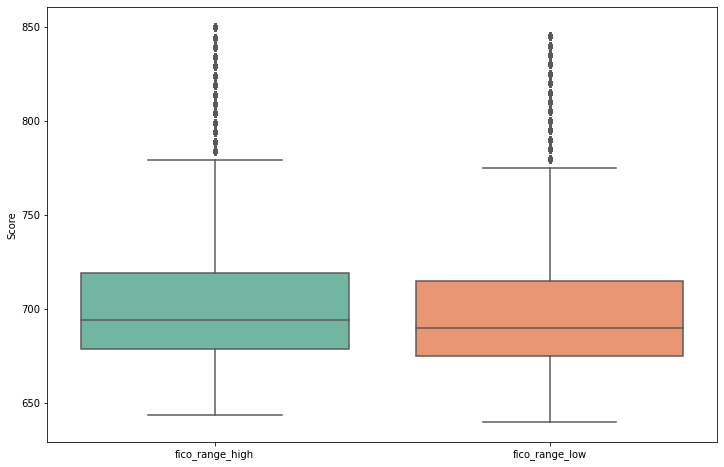

In [278]:
#Create a seaborn boxplot of the fico score to decide if they are similar. It can be seen they are 

plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=df[['fico_range_high', 'fico_range_low']], orient='v', palette="Set2")
plt.xticks()
plt.ylabel('Score');
print((df['fico_range_high']-df['fico_range_low']).sort_values(ascending=False))

In [280]:
# the higher and lower fico score difference is either 5 or 4. Therefore, I used their average as 'fico_score' and drop the two
# columns.
df['fico_score'] = (df['fico_range_high']+df['fico_range_low'])/2
df.drop(columns = ['fico_range_high', 'fico_range_low'], inplace = True)
df.shape

(2006744, 34)

In [281]:
df['fico_score']

id
68407277    677.0
68355089    717.0
66310712    787.0
68476807    697.0
68426831    692.0
            ...  
89885898    667.0
88977788    697.0
88985880    707.0
88224441    662.0
88215728    662.0
Name: fico_score, Length: 2006744, dtype: float64

In [282]:
df['policy_code'].value_counts()

1.0    2006744
Name: policy_code, dtype: int64

In [283]:
df.drop(columns = ['policy_code'], inplace = True)

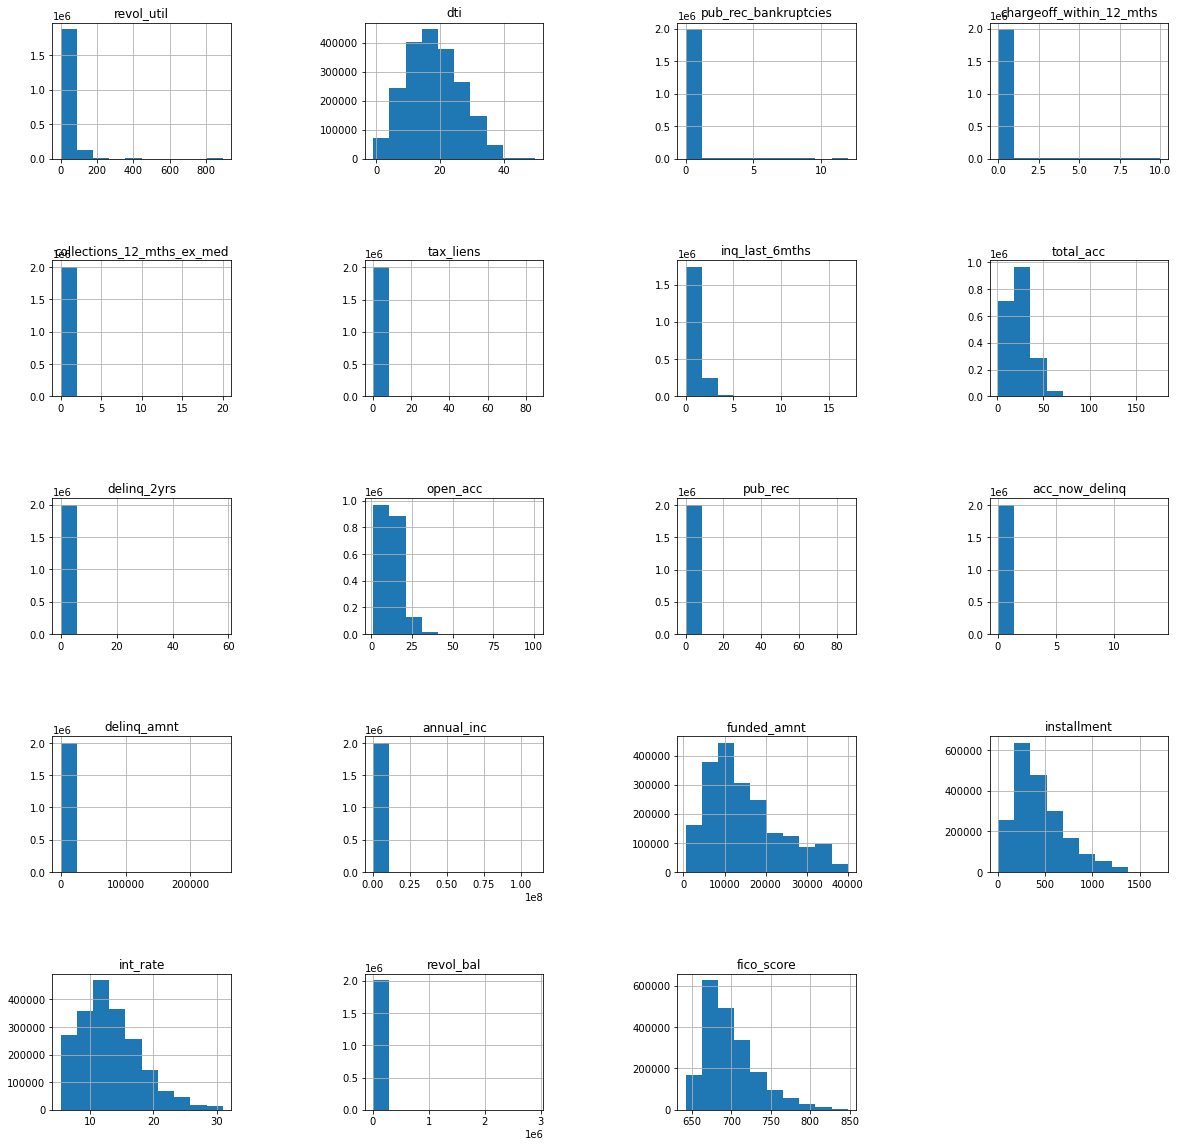

In [284]:
df.select_dtypes(np.number).hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.75, wspace=.75);

ValueError: too many values to unpack (expected 2)

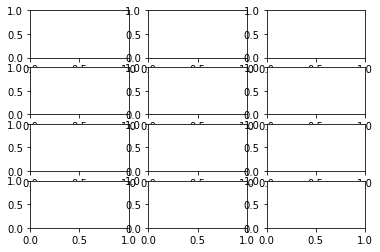

In [229]:
objectlist = ['home_ownership', 'initial_list_status', 'addr_state', 'disbursement_method', 'pymnt_plan', 'grade', 'verification_status', 
'loan_status', 'sub_grade', 'term', 'emp_length']
plt.subplots(4,3)
i = 0
for i, item in range(len(objectlist)), objectlist:
    ax[i]= plt.countplot(x=df[item]) 
            

In [218]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

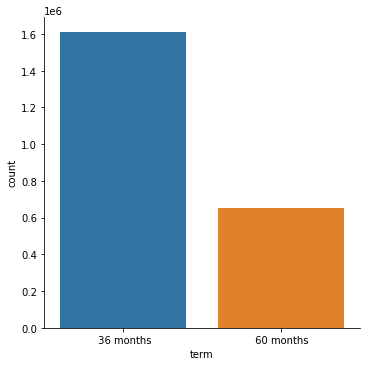

In [24]:
sns.catplot(x="term",data=df, kind="count")

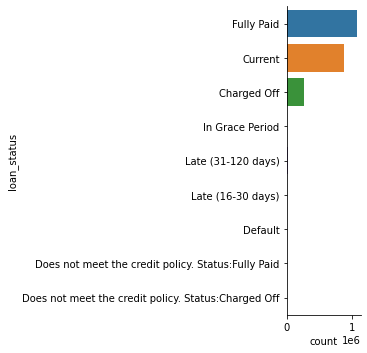

In [27]:
sns.catplot(y="loan_status",data=df, kind="count")

In [26]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [31]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [32]:
df['loan_status'].value_counts().sum()

2260668

In [33]:
df.shape

(2260701, 151)

In [34]:
2260701-2260668


33

In [37]:
x = df.loc[2100000,"issue_d"]

In [38]:
x[4:]

'2017'

In [40]:
type(x)

str

In [51]:
df["issue_year"] = df["issue_d"].str[4:]

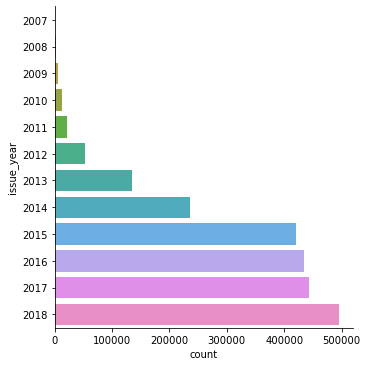

In [75]:
sns.catplot(y="issue_year", data=df, kind="count", order=["2007", '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

In [57]:
df["issue_year"].value_counts()

2018    495242
2017    443579
2016    434407
2015    421095
2014    235629
2013    134814
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: issue_year, dtype: int64

In [54]:
df["issue_year"].value_counts().sum()

2260668

In [55]:
df.shape

(2260701, 152)

In [56]:
2260701-2260668


33

In [62]:
df["grade"].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G', nan], dtype=object)

In [63]:
df["sub_grade"].unique()

array(['C4', 'C1', 'B4', 'C5', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2',
       'E2', 'A4', 'E3', 'A1', 'D4', 'F3', 'D1', 'B3', 'E4', 'D3', 'D2',
       'D5', 'A5', 'F2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5', nan], dtype=object)

In [66]:
df["sub_g"] = df["sub_grade"].str[1]

Text(0.5, 1.0, 'All loans grade/subgrade distribution')

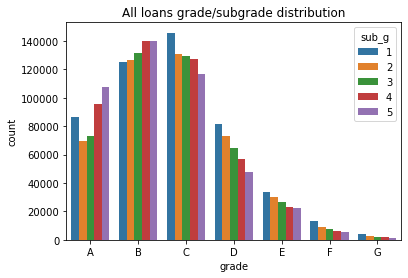

In [73]:
sns.countplot(x="grade", data=df, hue="sub_g", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue_order=['1', '2', '3', '4', '5'])
plt.title("All loans grade/subgrade distribution")

Text(0.5, 1.0, 'Fully-paid loans grade/subgrade distribution')

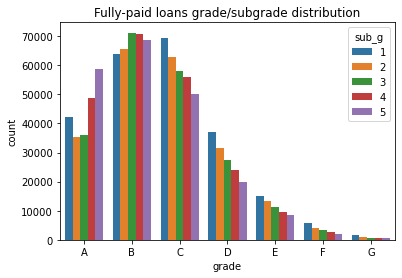

In [74]:
sns.countplot(x="grade", data=dfFull, hue="sub_g", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue_order=['1', '2', '3', '4', '5'])
plt.title("Fully-paid loans grade/subgrade distribution")

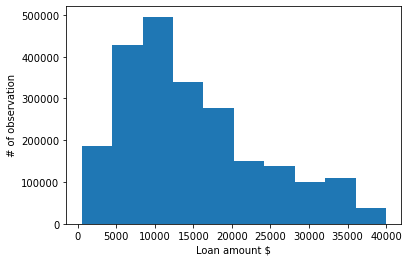

In [84]:
fig, ax=plt.subplots()
ax.hist(df['loan_amnt'])
ax.set_xlabel("Loan amount $")
ax.set_ylabel("# of observation")
plt.show()

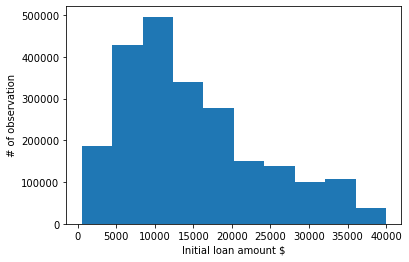

In [104]:
fig, ax=plt.subplots()
ax.hist(df['funded_amnt'])
ax.set_xlabel("Initial loan amount $")
ax.set_ylabel("# of observation")
plt.show()

In [108]:
(df['loan_amnt'] - df['funded_amnt'])


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2260696    0.0
2260697    0.0
2260698    0.0
2260699    NaN
2260700    NaN
Length: 2260701, dtype: float64